In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
#import statsmodels.api as sm
#import pylab as pl
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [2]:
#Read in data from source 
df_raw = pd.read_csv("C:\\DataScience\\DB\\SoilSampleData.csv")
df_raw.head()

,Field ID,Depth,Location Code,Date,Sample Code,Contaminated,Arsenic,Cadmium,Chromium,Copper,Lead,Manganese,Nickel,Zinc
0,TP12/0.2,0.2,TP12,25-Feb-16,16NaN11537,1,5.00,0.20,15,13,11,390,13,49
1,TP12/1.1,1.1,TP12,25-Feb-16,16NaN11537,0,5.00,0.20,NaN,13,11,NaN,12,46
2,TP12/2.5,2.5,TP12,25-Feb-16,16NaN11537,1,9,0.20,33,32,24,250,31,54
3,TP12/3.5,3.5,TP12,25-Feb-16,16NaN11537,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TP12/4.8,4.8,TP12,25-Feb-16,16NaN11537,0,5.00,0.20,260,13,11,200,27,31


In [3]:
#Columns of interest: Contaminted, Arsenic, Cadmium, Chromium, Cooper, Lead, Manganese, Nickel, Zinc
#Data Preparation
len(df_raw)   # no of observations

151

In [4]:
df_raw.shape    #no of rows and columns

(151, 14)

In [5]:
df_raw.count()  # no of diffrent values

Field ID          151
Depth             151
Location Code     151
Date              151
Sample Code       151
Contaminated      151
Arsenic           150
Cadmium           151
Chromium          151
Copper            151
Lead              151
Manganese         151
Nickel            151
Zinc              151
dtype: int64

In [6]:
df_raw = df_raw.dropna()  # drop null rows
df_raw = df_raw.drop_duplicates() # drop duplicates
len(df_raw)    

150

In [7]:
print(df_raw.dtypes)

Field ID           object
Depth             float64
Location Code      object
Date               object
Sample Code        object
Contaminated        int64
Arsenic            object
Cadmium            object
Chromium           object
Copper             object
Lead               object
Manganese          object
Nickel             object
Zinc               object
dtype: object


In [8]:
#Convert last 8 columns type to float

#df_raw = df_raw.replace('NaN', np.NaN) 

df_raw['Arsenic'] = df_raw.Arsenic.astype(float)
df_raw['Cadmium'] = df_raw.Cadmium.astype(float)
df_raw['Chromium'] = df_raw.Chromium.astype(float)
df_raw['Copper'] = df_raw.Copper.astype(float)
df_raw['Lead'] = df_raw.Lead.astype(float)
df_raw['Manganese'] = df_raw.Manganese.astype(float)
df_raw['Nickel'] = df_raw.Nickel.astype(float)
df_raw['Zinc'] = df_raw.Zinc.astype(float)

print(df_raw.dtypes)

Field ID           object
Depth             float64
Location Code      object
Date               object
Sample Code        object
Contaminated        int64
Arsenic           float64
Cadmium           float64
Chromium          float64
Copper            float64
Lead              float64
Manganese         float64
Nickel            float64
Zinc              float64
dtype: object


In [9]:
df_raw.isnull().sum()

Field ID           0
Depth              0
Location Code      0
Date               0
Sample Code        0
Contaminated       0
Arsenic           32
Cadmium           32
Chromium          40
Copper            28
Lead              30
Manganese         44
Nickel            34
Zinc              33
dtype: int64

In [10]:
#Replace nan values with column average 
df_clean = df_raw.fillna(df_raw.mean())

In [11]:
# Check for nan
df_clean.isnull().sum()

Field ID          0
Depth             0
Location Code     0
Date              0
Sample Code       0
Contaminated      0
Arsenic           0
Cadmium           0
Chromium          0
Copper            0
Lead              0
Manganese         0
Nickel            0
Zinc              0
dtype: int64

In [12]:
df_stat = df_clean.iloc[:, 6:14].describe().T
df_stat.insert(2,'critical val',[100,10,430,220,1100,220,290,710])
df_stat.insert(3,'critical margin', df_stat['critical val'] - df_stat['mean'])
df_stat

,count,mean,critical val,critical margin,std,min,25%,50%,75%,max
Arsenic,150.0,12.567797,100,87.432203,12.991210,5.0,5.0,9.500000,12.567797,120.0
Cadmium,150.0,1.340678,10,8.659322,4.081802,0.2,0.2,0.200000,1.340678,29.0
Chromium,150.0,173.009091,430,256.990909,424.251263,11.0,30.0,40.500000,173.009091,3300.0
Copper,150.0,36.016393,220,183.983607,58.408993,5.0,13.0,20.000000,36.016393,510.0
Lead,150.0,157.148333,1100,942.851667,507.210525,5.0,13.0,27.500000,157.148333,3700.0
Manganese,150.0,258.481132,220,-38.481132,144.656512,54.0,192.5,258.481132,258.481132,1400.0
Nickel,150.0,34.870690,290,255.129310,29.973933,6.0,20.0,31.000000,34.870690,220.0
Zinc,150.0,106.615385,710,603.384615,215.624389,8.0,35.0,58.500000,106.615385,2300.0


H0: The mean concentration on the contaminant is less than the critical concentration.
Null hypotesis is not true. Manganese mean is great than the critical value.

In [13]:
print(df_clean.shape)

(150, 14)


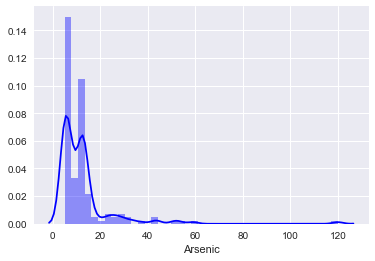

In [14]:
sns.distplot( df_clean["Arsenic"] , color="blue")

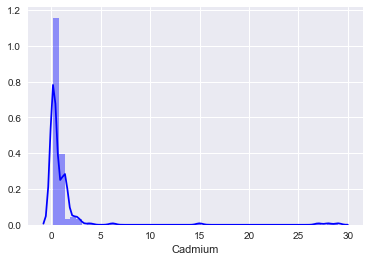

In [15]:
sns.distplot( df_clean["Cadmium"] , color="blue")

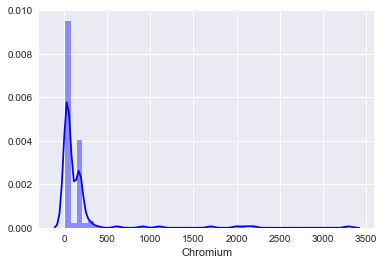

In [16]:
sns.distplot( df_clean["Chromium"] , color="blue")

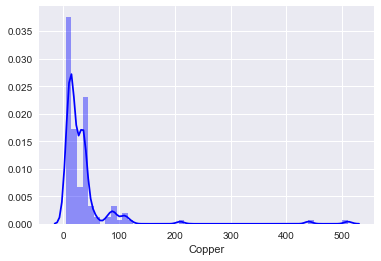

In [17]:
sns.distplot( df_clean["Copper"] , color="blue")

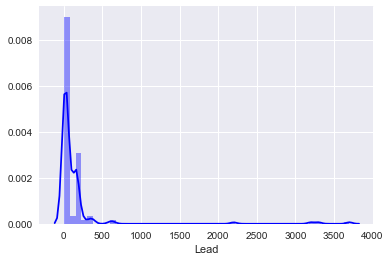

In [18]:
sns.distplot( df_clean["Lead"] , color="blue")

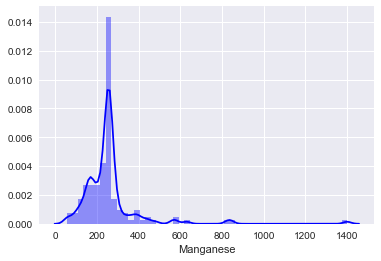

In [19]:
sns.distplot( df_clean["Manganese"] , color="blue")

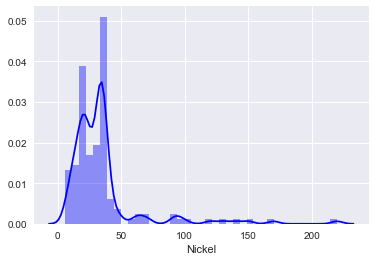

In [20]:
sns.distplot( df_clean["Nickel"] , color="blue")

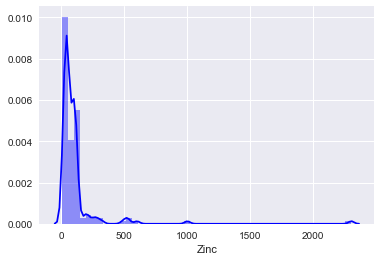

In [21]:
sns.distplot( df_clean["Zinc"] , color="blue")

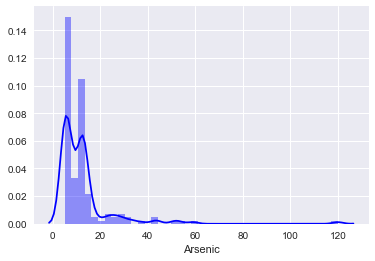

In [22]:
sns.distplot( df_clean["Arsenic"] , color="blue")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009130330C50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000091306AA470>]], dtype=object)

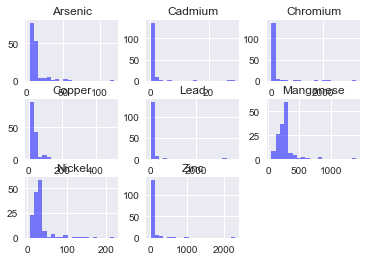

In [23]:
df_clean.iloc[:, 6:14].hist(color='blue', alpha=0.5, bins=20)

In [24]:
stats.skew(df_clean[['Arsenic', 'Cadmium', 'Chromium', 'Copper', 'Lead', 'Manganese', 'Nickel', 'Zinc']])

array([ 4.75891564,  5.8975554 ,  5.00467961,  6.0720774 ,  5.78944941,
        4.32899185,  3.39896778,  7.78195785])

In [25]:
stats.kurtosis(df_clean[['Arsenic', 'Cadmium', 'Chromium', 'Copper', 'Lead', 'Manganese', 'Nickel', 'Zinc']])

array([ 31.55669499,  34.95681806,  27.02577723,  42.42563003,
        33.58677098,  27.46574286,  13.79304899,  71.79837017])

In [26]:
df_clean.iloc[:, 6:14].corr() #correlation matrix

,Arsenic,Cadmium,Chromium,Copper,Lead,Manganese,Nickel,Zinc
Arsenic,1.000000,0.265301,0.024699,0.654389,0.293840,0.180178,-0.000251,0.825283
Cadmium,0.265301,1.000000,0.385936,0.085510,0.674833,0.034282,0.313350,0.326063
Chromium,0.024699,0.385936,1.000000,0.027568,0.018938,0.017861,0.742903,0.002409
Copper,0.654389,0.085510,0.027568,1.000000,0.102863,0.178956,0.081684,0.606092
Lead,0.293840,0.674833,0.018938,0.102863,1.000000,0.064846,-0.007640,0.381283
Manganese,0.180178,0.034282,0.017861,0.178956,0.064846,1.000000,0.244936,0.173325
Nickel,-0.000251,0.313350,0.742903,0.081684,-0.007640,0.244936,1.000000,0.052271
Zinc,0.825283,0.326063,0.002409,0.606092,0.381283,0.173325,0.052271,1.000000


Strong correlations: Zinc-Arsenic, Copper-Arsenic, Copper-Zinc 

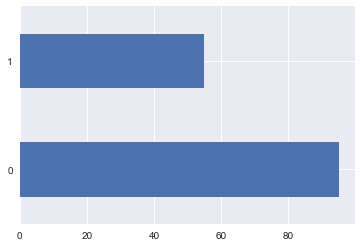

In [31]:
df_clean.Contaminated.value_counts().plot.barh()

In [27]:
#Select independent  variable matrix 
X = df_clean.iloc[:, 6:14].values
#Select dependent variable matrix
Y = df_clean.iloc[:, 5].values

In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X1_train = pca.fit_transform(X_train)
X1_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([ 0.3804512 ,  0.21458296,  0.19171673,  0.10904234,  0.04891348,
        0.03865981,  0.0159376 ,  0.00069589])

First 2 principal components explain 60% of the variance (0.380+0.214 =0.594) Same shows the next graph. 

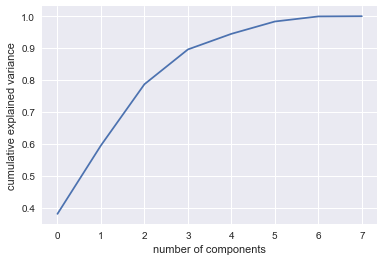

In [34]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([ 0.3804512 ,  0.21458296])

In [36]:
X_train.shape

(120, 2)

In [37]:
X_test.shape

(30, 2)

In [38]:
# Plot pca components using heat map
df_components = pd.DataFrame(pca.components_)
df_components.columns = df_clean.iloc[:, 6:14].columns
df_components

,Arsenic,Cadmium,Chromium,Copper,Lead,Manganese,Nickel,Zinc
0,0.476650,0.398101,0.077027,0.382433,0.409081,0.193462,0.118738,0.493212
1,-0.160197,-0.007229,0.665308,-0.067991,-0.033909,0.234220,0.676247,-0.117082


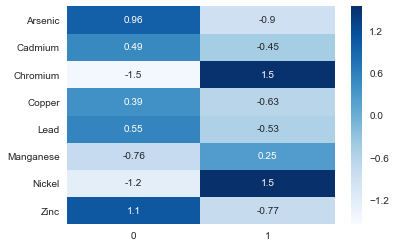

In [39]:
df_components_t = df_components.T
df_norm_col=(df_components_t-df_components_t.mean())/df_components_t.std()
sns.heatmap(df_norm_col, cmap="Blues", annot=True)

In [40]:
from sklearn.svm import SVC
classifier = SVC()
trained_model =classifier.fit(X_train, Y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(trained_model.score(X_train, Y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(trained_model.score(X_test, Y_test)))

Accuracy of SVM classifier on training set: 0.72
Accuracy of SVM classifier on test set: 0.73


In [41]:
Y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[19,  2],
       [ 6,  3]])

In [42]:
print('Model accurcy:',(cm[0,0]+cm[1,1])/(cm[1,0]+cm[0,1] + (cm[0,0]+cm[1,1])))

Model accurcy: 0.733333333333


In [43]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
trained_model=classifier.fit(X_train, Y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(trained_model.score(X_train, Y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(trained_model.score(X_test, Y_test)))

Accuracy of SVM classifier on training set: 0.69
Accuracy of SVM classifier on test set: 0.67


In [44]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[19,  2],
       [ 8,  1]])

In [45]:
print('Model accurcy:',(cm[0,0]+cm[1,1])/(cm[1,0]+cm[0,1] + (cm[0,0]+cm[1,1])))

Model accurcy: 0.666666666667


In [47]:
# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
accuracies.mean()

0.68717948717948718

In [48]:
accuracies.std()

0.10209610593304611

In [49]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
trined_model=classifier.fit(X_train, Y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(trained_model.score(X_train, Y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(trained_model.score(X_test, Y_test)))

Accuracy of SVM classifier on training set: 0.69
Accuracy of SVM classifier on test set: 0.67


In [50]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[19,  2],
       [ 6,  3]])

In [51]:
print('Model accurcy:',(cm[0,0]+cm[1,1])/(cm[1,0]+cm[0,1] + (cm[0,0]+cm[1,1])))

Model accurcy: 0.733333333333


In [52]:
# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
accuracies.mean()

0.67948717948717952

In [53]:
# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
accuracies.std()

0.10429412141573056

In [54]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
trained_model=classifier.fit(X_train, Y_train)
print('Accuracy of DecisionTreeClassifier classifier on training set: {:.2f}'.format(trained_model.score(X_train, Y_train)))
print('Accuracy of DecisionTreeClassifier classifier on test set: {:.2f}'.format(trained_model.score(X_test, Y_test)))


Accuracy of DecisionTreeClassifier classifier on training set: 1.00
Accuracy of DecisionTreeClassifier classifier on test set: 0.73


In [55]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[15,  6],
       [ 2,  7]])

In [56]:
print('Model accurcy:',(cm[0,0]+cm[1,1])/(cm[1,0]+cm[0,1] + (cm[0,0]+cm[1,1])))

Model accurcy: 0.733333333333


In [57]:
# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
accuracies.mean()

0.70093240093240095

In [58]:
accuracies.std()

0.16566478828552919

In [59]:
report = classification_report(Y_test, Y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.88      0.71      0.79        21
          1       0.54      0.78      0.64         9

avg / total       0.78      0.73      0.74        30



In [60]:
# Fitting K-NN to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
trained_model = classifier.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(trained_model.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(trained_model.score(X_test, Y_test)))


Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.77


In [61]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
m = confusion_matrix(Y_test, Y_pred)
cm

array([[17,  4],
       [ 3,  6]])

In [62]:
print('Model accurcy:',(cm[0,0]+cm[1,1])/(cm[1,0]+cm[0,1] + (cm[0,0]+cm[1,1])))

Model accurcy: 0.766666666667


In [63]:
# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
accuracies.mean()

0.74446386946386944

In [64]:
accuracies.std()

0.1203780615894423

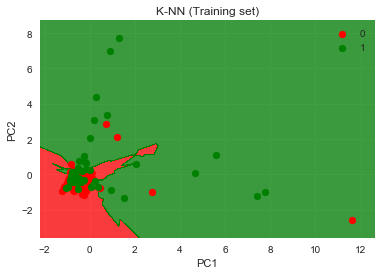

In [66]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

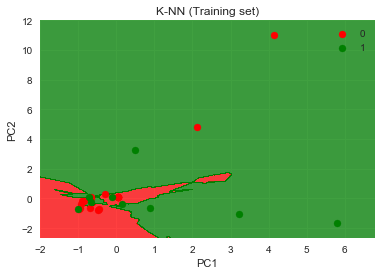

In [67]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()